Installations

In [104]:
!sudo pip3 install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [105]:
!pip install --user --ignore-installed --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 65.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 66.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.5/126.5 KB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 42.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 KB 37.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 61.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 33.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 KB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 29.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━

Imports

In [ ]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from keras import layers
from keras.models import Sequential
tf.get_logger().setLevel('ERROR')


# Create a function to append the full path to the folder
def get_full_path(path):
  ## Folder in google drive
  
  return path
     

In [ ]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


Unziping the CNN_Assignment.zip file

In [ ]:
!unzip gdrive/MyDrive/CNN_assignment.zip

Archive:  gdrive/MyDrive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflating: Skin ca

In [ ]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train")
data_dir_test = pathlib.Path('Skin cancer ISIC The International Skin Imaging Collaboration/Test')

In [ ]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


Load using keras.preprocessing

Create a dataset

In [ ]:
batch_size = 32
img_height = 180
img_width = 180

In [ ]:
# create train dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [ ]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)
     

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [ ]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


Visualize The Plot

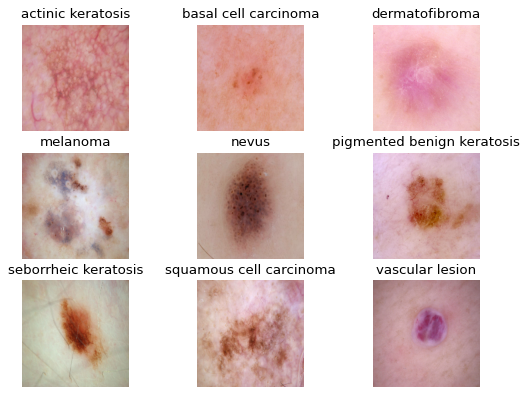

In [ ]:
from matplotlib.pyplot import figure
import matplotlib.image as mpimg

# Setting the plot size
figure(figsize=(8, 6), dpi=80)

# Find the element with the selected label
def find_sample_with_label_in_batch_dataset(dataset, to_find_label):
  for images, labels in dataset:
    for i, label in enumerate(labels):
      if label == to_find_label: 
        return images[i], label;

for i, class_name in enumerate(class_names):
  image, label = find_sample_with_label_in_batch_dataset(train_ds, i);
  ax = plt.subplot(3, 3, i + 1)
  plt.imshow(image.numpy().astype("uint8"))
  plt.title(class_name)
  plt.axis('off')

In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

CREATE MODEL

In [ ]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
model = Sequential()
input_shape=(180,180,3)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2, input_shape=input_shape))
model.add(layers.Conv2D(64,kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.2, input_shape=input_shape))
model.add(layers.Conv2D(128,kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(512,activation = "softmax"))

COMPILE MODEL

In [ ]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 23s 95ms/step - loss: 3.1825 - accuracy: 0.3661 - val_loss: 14.3541 - val_accuracy: 0.0000e+00
Epoch 2/20
56/56 [==============================] - 2s 32ms/step - loss: 2.1087 - accuracy: 0.4794 - val_loss: 11.8859 - val_accuracy: 0.0000e+00
Epoch 3/20
56/56 [==============================] - 2s 34ms/step - loss: 1.8833 - accuracy: 0.5084 - val_loss: 16.0934 - val_accuracy: 0.0000e+00
Epoch 4/20
56/56 [==============================] - 2s 32ms/step - loss: 1.6993 - accuracy: 0.5804 - val_loss: 7.9553 - val_accuracy: 0.0089
Epoch 5/20
56/56 [==============================] - 2s 31ms/step - loss: 1.4399 - accuracy: 0.5871 - val_loss: 9.8649 - val_accuracy: 0.0022
Epoch 6/20
56/56 [==============================] - 2s 31ms/step - loss: 1.3819 - accuracy: 0.6256 - val_loss: 13.1341 - val_accuracy: 0.0067
Epoch 7/20
56/56 [==============================] - 2s 31ms/step - loss: 1.2263 - accuracy: 0.6557 - val_loss: 3.4194 - val_accuracy: 0.2

VISUALIZE THE RESULTS


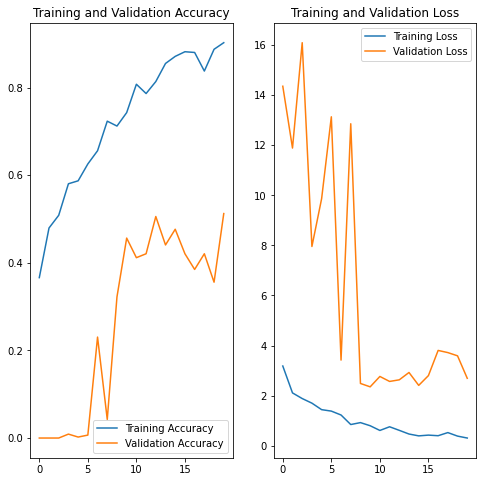

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

My findings here From Above Analysis

  The model is still Overfitting for 20 epochs
  

In [98]:
#Applied Augmentation
augmentation_layers = keras.Sequential([
    layers.RandomFlip(mode="horizontal_and_vertical",input_shape=(img_height,img_width,3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1)
])

Create the modeL

In [99]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential
model = Sequential()
model.add(augmentation_layers)
input_shape=(180,180,3)
model.add(tf.keras.layers.experimental.preprocessing.Rescaling(1./255, input_shape=(180, 180, 3)))
model.add(layers.Conv2D(16, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.2, input_shape=input_shape))
model.add(layers.Conv2D(64,kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3, 3), activation='relu',input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2, 2)))
model.add(layers.Flatten()) 
model.add(layers.Dense(512,activation = "softmax"))

COMPILE MODLE

In [100]:
from keras.optimizers import Adam
opt = Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

train the model

In [101]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 8s 109ms/step - loss: 2.1972 - accuracy: 0.3739 - val_loss: 2.2597 - val_accuracy: 0.1477
Epoch 2/20
56/56 [==============================] - 3s 51ms/step - loss: 1.6642 - accuracy: 0.4258 - val_loss: 2.2839 - val_accuracy: 0.1521
Epoch 3/20
56/56 [==============================] - 3s 49ms/step - loss: 1.5459 - accuracy: 0.4821 - val_loss: 2.3608 - val_accuracy: 0.1588
Epoch 4/20
56/56 [==============================] - 3s 49ms/step - loss: 1.4828 - accuracy: 0.4849 - val_loss: 2.5014 - val_accuracy: 0.1655
Epoch 5/20
56/56 [==============================] - 3s 49ms/step - loss: 1.3672 - accuracy: 0.5251 - val_loss: 2.4450 - val_accuracy: 0.2371
Epoch 6/20
56/56 [==============================] - 3s 50ms/step - loss: 1.3482 - accuracy: 0.5262 - val_loss: 1.9052 - val_accuracy: 0.3177
Epoch 7/20
56/56 [==============================] - 3s 49ms/step - loss: 1.2410 - accuracy: 0.5541 - val_loss: 1.9138 - val_accuracy: 0.3647
Epoch 8/20
5

Visualizing the results

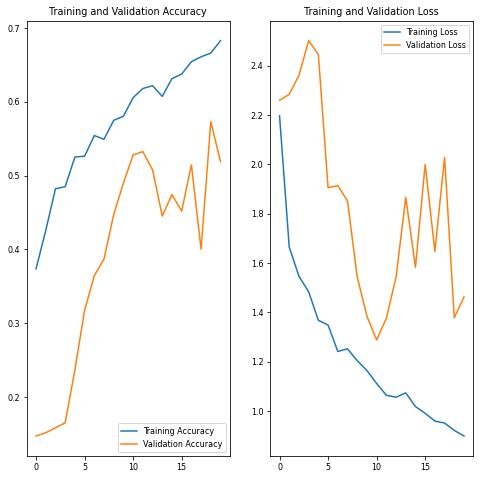

In [103]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

From The analysis the model is still Overfitting

##Find the distribution of classes in the training dataset.

In [ ]:
df = pd.DataFrame({ 'class_name': [], 'count': [] })
Train='Skin cancer ISIC The International Skin Imaging Collaboration/Train'
for class_name in class_names:
  df_temp = pd.DataFrame({ 'class_name': [class_name], 'count': [len(os.listdir(get_full_path(f'Skin cancer ISIC The International Skin Imaging Collaboration/Train/{class_name}')))] })
  df = pd.concat([df, df_temp], ignore_index=True)

df.head(10)

,class_name,count
0,actinic keratosis,114.0
1,basal cell carcinoma,376.0
2,dermatofibroma,95.0
3,melanoma,438.0
4,nevus,357.0
5,pigmented benign keratosis,462.0
6,seborrheic keratosis,77.0
7,squamous cell carcinoma,181.0
8,vascular lesion,139.0


My Findings Are:

Which class has the least number of samples?
seborrheic keratosis	

Which classes dominate the data in terms proportionate number of samples?	pigmented benign keratosis


Rectify the class imbalance

In [97]:
!pip install Augmentor

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


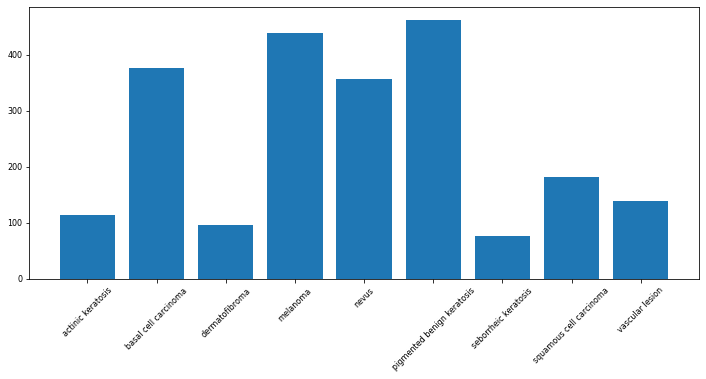

In [ ]:
# Plot a bar chart to visualize
plt.rc('font', size=8)
plt.figure(figsize=(12,5))
plt.bar(df['class_name'], df['count'])
plt.xticks(rotation=45)
plt.show()

Using Augmentor

In [ ]:
import Augmentor
path_to_training_dataset="Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
for i in class_names:
    p = Augmentor.Pipeline(get_full_path(path_to_training_dataset ),save_format='jpg', output_directory='Train_Augmented')
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63B6D6E6A0>: 100%|██████████| 500/500 [00:46<00:00, 10.72 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63B767F850>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63B6D16130>: 100%|██████████| 500/500 [00:38<00:00, 12.97 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=1504x1129 at 0x7F63B6D14FA0>: 100%|██████████| 500/500 [00:38<00:00, 13.08 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63CC07C9D0>: 100%|██████████| 500/500 [00:41<00:00, 12.08 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63B76CB910>: 100%|██████████| 500/500 [00:33<00:00, 14.74 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F63CC0CC4F0>: 100%|██████████| 500/500 [00:41<00:00, 12.00 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F63B77A6700>: 100%|██████████| 500/500 [00:42<00:00, 11.81 Samples/s]


Initialised with 2239 image(s) found.
Output directory set to Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F63CC08C400>: 100%|██████████| 500/500 [00:35<00:00, 13.96 Samples/s]


In [ ]:
# Counting the number of sample
data_dir_train_augmented = pathlib.Path(get_full_path('Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented'))
image_count_train = len(list(data_dir_train_augmented.glob('*/*.jpg')))
print(image_count_train)

4500


In [ ]:
# Create a dataframe with class name and count of image in that class
df = pd.DataFrame({ 'class_name': [], 'count': [] })
Train='Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented/'
for class_name in class_names:
  df_temp = pd.DataFrame({ 'class_name': [class_name], 'count': [len(os.listdir(get_full_path(f'Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented/{class_name}')))] })
  df = pd.concat([df, df_temp], ignore_index=True)

df.head(10)

,class_name,count
0,actinic keratosis,235.0
1,basal cell carcinoma,797.0
2,dermatofibroma,182.0
3,melanoma,892.0
4,nevus,647.0
5,pigmented benign keratosis,920.0
6,seborrheic keratosis,177.0
7,squamous cell carcinoma,355.0
8,vascular lesion,295.0


Train the model on the data created using Augmentor

Create a training dataset

In [ ]:
# Augmentation For Test Dataset
data_dir_trainAugmented = pathlib.Path("Skin cancer ISIC The International Skin Imaging Collaboration/Train/Train_Augmented")
train_ds_Augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_trainAugmented,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 3600 files for training.


In [ ]:
## AUgmentation for validation dataset 
val_ds_augmented = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_trainAugmented,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 4500 files belonging to 9 classes.
Using 900 files for validation.


MODEL CREATION


In [93]:
from keras.regularizers import l2

input_shape = (img_height, img_width, 3);
# model
model = Sequential()

model.add(layers.Rescaling(scale=1./255, input_shape=input_shape))

#First  layer
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
#Second Layer
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.2))
#Third  Layer
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128,kernel_size=(3,3),activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Dropout(0.25))
# flatten and put a fully connected layer
model.add(layers.Flatten())
model.add(layers.Dense(512, kernel_regularizer=l2(0.01)))
model.add(layers.Activation('relu'))
model.add(layers.Dropout(0.5))
# softmax layer
model.add(layers.Dense(len(class_names), activation='softmax'))
# model summary
model.summary()



Model: "sequential_25"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_24 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_83 (Conv2D)          (None, 180, 180, 32)      896       
                                                                 
 batch_normalization_40 (Bat  (None, 180, 180, 32)     128       
 chNormalization)                                                
                                                                 
 conv2d_84 (Conv2D)          (None, 178, 178, 32)      9248      
                                                                 
 batch_normalization_41 (Bat  (None, 178, 178, 32)     128       
 chNormalization)                                                
                                                                 
 max_pooling2d_76 (MaxPoolin  (None, 89, 89, 32)     

COMPILATION OF CODE

In [94]:

##CHOOSED SGD
model.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

 Train your model FOR 20 EPOCHS
 

In [95]:
epochs = 20
history1 = model.fit(
 train_ds_Augmented,
  validation_data=val_ds_augmented,
  epochs=epochs
)

Epoch 1/20
113/113 [==============================] - 96s 142ms/step - loss: 13.3049 - accuracy: 0.3878 - val_loss: 13.5460 - val_accuracy: 0.1689
Epoch 2/20
113/113 [==============================] - 17s 141ms/step - loss: 10.9906 - accuracy: 0.5178 - val_loss: 12.6970 - val_accuracy: 0.2344
Epoch 3/20
113/113 [==============================] - 18s 151ms/step - loss: 10.3880 - accuracy: 0.5769 - val_loss: 11.4766 - val_accuracy: 0.3700
Epoch 4/20
113/113 [==============================] - 17s 143ms/step - loss: 9.8699 - accuracy: 0.6164 - val_loss: 10.3819 - val_accuracy: 0.4756
Epoch 5/20
113/113 [==============================] - 17s 142ms/step - loss: 9.3829 - accuracy: 0.6636 - val_loss: 9.3373 - val_accuracy: 0.6500
Epoch 6/20
113/113 [==============================] - 17s 143ms/step - loss: 8.9464 - accuracy: 0.6944 - val_loss: 8.7577 - val_accuracy: 0.7144
Epoch 7/20
113/113 [==============================] - 17s 143ms/step - loss: 8.5150 - accuracy: 0.7306 - val_loss: 9.4884 -

TRAIN OF MODEL FOR 50 EPOCHS


In [90]:
epochs = 50
history = model.fit(
 train_ds_Augmented,
  validation_data=val_ds_augmented,
  epochs=epochs
)

Epoch 1/50
113/113 [==============================] - 18s 143ms/step - loss: 4.5859 - accuracy: 0.4111 - val_loss: 5.3171 - val_accuracy: 0.3411
Epoch 2/50
113/113 [==============================] - 17s 143ms/step - loss: 4.2039 - accuracy: 0.4747 - val_loss: 6.5973 - val_accuracy: 0.1933
Epoch 3/50
113/113 [==============================] - 17s 144ms/step - loss: 3.9669 - accuracy: 0.5236 - val_loss: 4.5582 - val_accuracy: 0.4689
Epoch 4/50
113/113 [==============================] - 19s 162ms/step - loss: 3.7618 - accuracy: 0.5381 - val_loss: 5.5189 - val_accuracy: 0.2922
Epoch 5/50
113/113 [==============================] - 18s 146ms/step - loss: 3.5881 - accuracy: 0.5717 - val_loss: 14.3483 - val_accuracy: 0.2211
Epoch 6/50
113/113 [==============================] - 17s 144ms/step - loss: 3.4183 - accuracy: 0.5917 - val_loss: 3.3820 - val_accuracy: 0.6256
Epoch 7/50
113/113 [==============================] - 17s 145ms/step - loss: 3.2316 - accuracy: 0.6336 - val_loss: 3.5235 - val_a

Visualize the model results

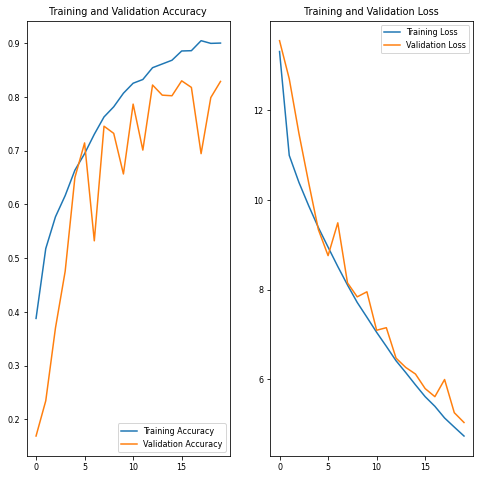

In [96]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']
epochs=20
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Results

For 20 epochs getting 90 percent accuracy and 82 percent validation accuracy.
For 50 epochs getting 94 percent accuracy and 83 percent validation accuration.
overfitting and issue of imbalancing got solved to maximum extent by using augmentation
Yes ,Augmentor helped to rebalance the class